In [1]:
df = pd.read_csv("asset/multipleChoiceResponses.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [3]:
df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q1_OTHER_TEXT', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q6_OTHER_TEXT', 'Q7',
       ...
       'Q49_OTHER_TEXT', 'Q50_Part_1', 'Q50_Part_2', 'Q50_Part_3',
       'Q50_Part_4', 'Q50_Part_5', 'Q50_Part_6', 'Q50_Part_7', 'Q50_Part_8',
       'Q50_OTHER_TEXT'],
      dtype='object', length=395)

In [12]:
df['Q3'].unique()

array(['In which country do you currently reside?',
       'United States of America', 'Indonesia', 'India', 'Colombia',
       'Chile', 'Turkey', 'Hungary', 'Ireland', 'France', 'Argentina',
       'Japan', 'Nigeria', 'Spain', 'Other',
       'Iran, Islamic Republic of...',
       'United Kingdom of Great Britain and Northern Ireland', 'Poland',
       'Kenya', 'Denmark', 'Netherlands', 'China', 'Sweden', 'Ukraine',
       'Canada', 'Australia', 'Russia', 'Austria', 'Italy', 'Mexico',
       'Germany', 'I do not wish to disclose my location', 'Singapore',
       'Brazil', 'Switzerland', 'South Africa', 'South Korea', 'Malaysia',
       'Hong Kong (S.A.R.)', 'Egypt', 'Tunisia', 'Portugal', 'Thailand',
       'Morocco', 'Pakistan', 'Czech Republic', 'Romania', 'Israel',
       'Philippines', 'Bangladesh', 'Belarus', 'Viet Nam', 'Belgium',
       'New Zealand', 'Norway', 'Finland', 'Greece', 'Peru',
       'Republic of Korea'], dtype=object)

In [45]:
def per_df(col) :
    per_results = df[col].value_counts() / df[col].value_counts().sum()
    # series / float -> series 반환
    return per_results   

In [43]:
display(pd.DataFrame(df["Q3"].value_counts()).reset_index().head(3))
display(df.groupby("Q3").size().reset_index(name="counts").sort_values(by='counts',ascending=False).reset_index(drop=True).head(3))

,index,Q3
0,United States of America,4716
1,India,4417
2,China,1644


,Q3,counts
0,United States of America,4716
1,India,4417
2,China,1644


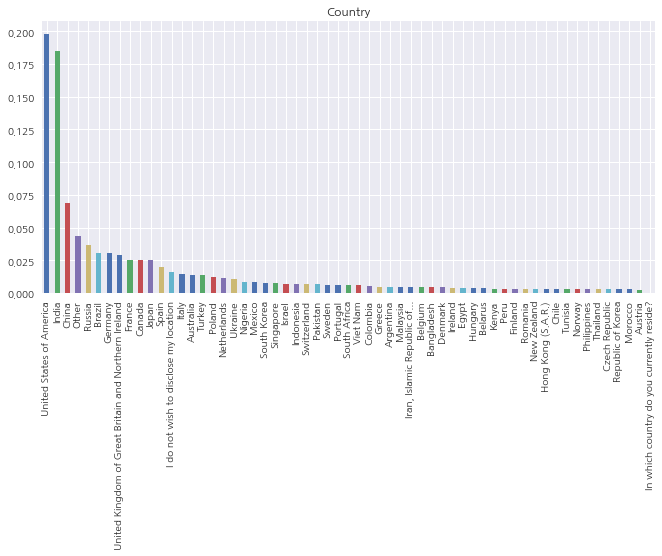

In [70]:
per_df('Q3').plot.bar(figsize=(11,5)).set_title("Country")
# Series에 있는 plot 명령
plt.show()

In [81]:
def comp(df, col1, criteria_1, criteria_2, col2):
    def per_df(df_, col) :
        per_results = df_[col].value_counts() / df_[col].value_counts().sum()
        # series / float -> series 반환
        return per_results 
    
    df_col1_cri1 = df[df[col1]==criteria_1]
    df_col1_cri2 = df[df[col1]==criteria_2]
    
    f, ax = plt.subplots(2,1, figsize=(11,5))
    
    return per_df(df_col1_cri1, col2).plot.bar(ax=ax[0]), per_df(df_col1_cri2, col2).plot.bar(ax=ax[1])

(<matplotlib.axes._subplots.AxesSubplot at 0x271fa96aa90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x271fa9ff3c8>)

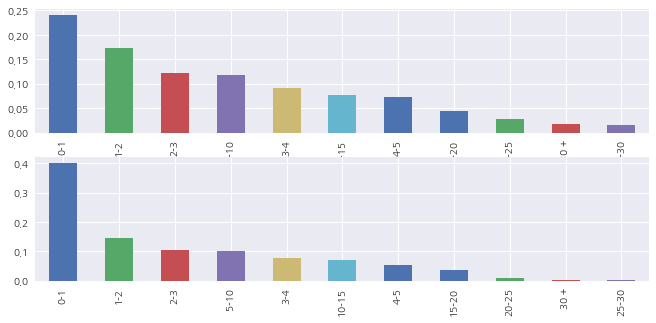

In [82]:
comp(df, 'Q3', 'United States of America', 'India', 'Q8')

------------------ use danial custom function ------------------------------------------------------------------------